In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization import perc, SetPlotRC, ApplyFont

In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

## Read MNIST Results

In [3]:
df_results_corinfo_mnist = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_MNIST_V1.pkl")
df_results_corinfo_mnist['Trn_ACC'] = df_results_corinfo_mnist.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_corinfo_mnist['Tst_ACC'] = df_results_corinfo_mnist.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_setting_corinfo_mnist = df_results_corinfo_mnist[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_corinfo_mnist = df_setting_corinfo_mnist.iloc[df_setting_corinfo_mnist['Trn_ACC'].argmax()]['setting_number']
best_setting_corinfo_mnist = 1


weight_angle_corinfo_mnist = np.stack(df_results_corinfo_mnist.loc[df_results_corinfo_mnist["setting_number"] == best_setting_corinfo_mnist]['forward_backward_weight_angle_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
# compute the mean, 25/75 percentiles, and standard deviation
(mean_corinfo_wa_mnist,
 perc_25_corinfo_wa_mnist,
 perc_75_corinfo_wa_mnist,
 std_data_corinfo_wa_mnist) = perc(weight_angle_corinfo_mnist)


## Read Fashion MNIST Results

In [4]:
df_results_corinfo_fashion = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_FashionMNIST_V1.pkl")
df_results_corinfo_fashion['Trn_ACC'] = df_results_corinfo_fashion.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_corinfo_fashion['Tst_ACC'] = df_results_corinfo_fashion.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_setting_corinfo_fashion = df_results_corinfo_fashion[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_corinfo_fashion = df_setting_corinfo_fashion.iloc[df_setting_corinfo_fashion['Trn_ACC'].argmax()]['setting_number']
best_setting_corinfo_fashion 


weight_angle_corinfo_fashion = np.stack(df_results_corinfo_fashion.loc[df_results_corinfo_fashion["setting_number"] == best_setting_corinfo_fashion]['forward_backward_weight_angle_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
# compute the mean, 25/75 percentiles, and standard deviation
(mean_corinfo_wa_fashion,
 perc_25_corinfo_wa_fashion,
 perc_75_corinfo_wa_fashion,
 std_data_corinfo_wa_fashion) = perc(weight_angle_corinfo_fashion)

## Read CIFAR10 Results

In [5]:
df_results_corinfo_cifar = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_CIFAR10_V1.pkl")
df_results_corinfo_cifar['Trn_ACC'] = df_results_corinfo_cifar.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_corinfo_cifar['Tst_ACC'] = df_results_corinfo_cifar.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_setting_corinfo_cifar = df_results_corinfo_cifar[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_corinfo_cifar = df_setting_corinfo_cifar.iloc[df_setting_corinfo_cifar['Trn_ACC'].argmax()]['setting_number']
best_setting_corinfo_cifar 


weight_angle_corinfo_cifar = np.stack(df_results_corinfo_cifar.loc[df_results_corinfo_cifar["setting_number"] == best_setting_corinfo_cifar]['forward_backward_weight_angle_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
# compute the mean, 25/75 percentiles, and standard deviation
(mean_corinfo_wa_cifar,
 perc_25_corinfo_wa_cifar,
 perc_75_corinfo_wa_cifar,
 std_data_corinfo_wa_cifar) = perc(weight_angle_corinfo_cifar)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


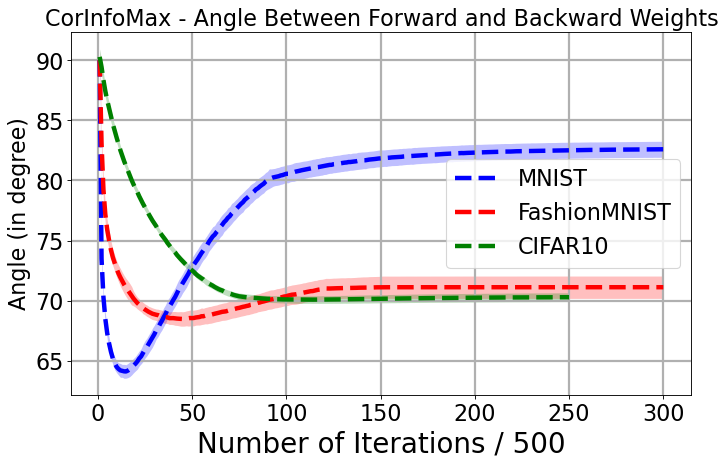

In [6]:
x_mnist = np.arange(1, mean_corinfo_wa_mnist.shape[0]+1)
x_cifar = np.arange(1, mean_corinfo_wa_cifar.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(x_mnist, mean_corinfo_wa_mnist, "b--", linewidth=4, label = "MNIST")
plt.fill_between(x_mnist, mean_corinfo_wa_mnist - std_data_corinfo_wa_mnist, mean_corinfo_wa_mnist + std_data_corinfo_wa_mnist, alpha=0.25, linewidth=0, color='blue')

plt.plot(x_mnist, mean_corinfo_wa_fashion, "r--", linewidth=4, label = "FashionMNIST")
plt.fill_between(x_mnist, mean_corinfo_wa_fashion - std_data_corinfo_wa_fashion, mean_corinfo_wa_fashion + std_data_corinfo_wa_fashion, alpha=0.25, linewidth=0, color='red')

plt.plot(x_cifar, mean_corinfo_wa_cifar, "g--", linewidth=4, label = "CIFAR10")
plt.fill_between(x_cifar, mean_corinfo_wa_cifar - std_data_corinfo_wa_cifar, mean_corinfo_wa_cifar + std_data_corinfo_wa_cifar, alpha=0.25, linewidth=0, color='green')

gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Angle (in degree)',fontsize=25)
plt.xlabel(r"Number of Iterations / 500",fontsize=25)
plt.title("CorInfoMax - Angle Between Forward and Backward Weights")
# plt.axis([0.0,50, mean_[0] - 0.01,0.985])
plt.legend(fontsize = 20, loc = "best")
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMaxAngleForwardBackward.pdf', format='pdf')